In [1]:
# Load Libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from urllib.request import urlopen
from numpy import loadtxt
from numpy import unique


In [4]:
# Load dataset
path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv"
df = read_csv(path, header=None)
print(df.shape)
print("")
counts = df.nunique()
to_del = [i for i, v in enumerate(counts) if v == 1]
print(to_del)
print("")
# Drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)
print("")
data = loadtxt(urlopen(path), delimiter=',')

# Summarize the number of unique values in each column
for i in range(data.shape[1]):
    num = len(unique(data[:, i]))
    percentage = float(num)/data.shape[0]*100
    if percentage < 1:
        print('%d %d,%.1f%%' % (i, num, percentage))


(937, 50)

[22]

(937, 49)

21 9,1.0%
22 1,0.1%
24 9,1.0%
25 8,0.9%
26 9,1.0%
32 4,0.4%
36 3,0.3%
38 9,1.0%
39 9,1.0%
45 2,0.2%
49 2,0.2%


In [5]:
to_del1 = [i for i, v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del1)
# Drop useless columns
df.drop(to_del1, axis=0, inplace=True)
print(df.shape)
print()
print("S2-Nikhil_Chauhan")
print()
# Locating dataset variables
duplicates = df.duplicated()
print(duplicates.any())
print(df[duplicates])


[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(926, 49)

S2-Nikhil_Chauhan

False
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Index: []

[0 rows x 49 columns]


In [6]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)


(926, 49)
(926, 49)


C:\Users\Nikhil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


LR: 0.016216 (0.015759)
LDA: 0.013514 (0.015989)
KNN: 0.008108 (0.006620)


C:\Users\Nikhil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nikhil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nikhil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


CART: 0.009459 (0.012162)
NB: 0.012162 (0.014109)


C:\Users\Nikhil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Nikhil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


SVM: 0.012162 (0.009459)


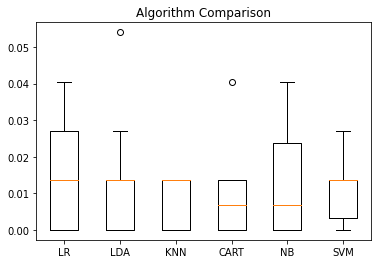

In [8]:
array = df.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.20, random_state=1)
models = []
models.append(('LR', LogisticRegression(
    solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()
